<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.1. Import Necessary Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.2. Import the dataset (concrete.csv) and read it into DataFrame:

In [27]:
data = pd.read_csv("concrete.csv")
data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


# Performing Basic EDA

Find the shape of the data,data type of individual columns

Check the presence of missing values

Descriptive stats of numerical columns

Find the distribution of numerical columns and the asssociated skeweness and presence of outliers

Distribution of categorical columns


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.3 Shape of data :

In [28]:
data.shape

(1030, 9)

<h3><b>We see that there are 1030 rows and 9 columns in data.</b><h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">1.4 Summarised Information about the data and the datatypes of each respective attributes.

In [29]:
data.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### We see that all attributes are numeric, so no need to do any addiotnal change. Our target varaible is strength which is continuous in nature.

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.5 Check the dataset for any missing values


In [31]:
data.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [32]:
data.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

<h3><b>We see that there are no missing or null values in data.</b> </h3>

<h3><b> Now, we will see Summarised Data : </b> </h3>

In [33]:
data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


<h3><b>Now that we have seen various statistics and measures of the various attributes, and got a fair idea about the data, lets see the distribution of data through visualization. This will visually display the spread and distribution of data, also highlighting the outliers. </b></h3>

<h3><b>This visual representation will not only take into account the five point summary while displaying , but also give a clearer repesentation of spread and also detect outliers</b></h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.6 Univarite Analysis using Distribution of Attributes :

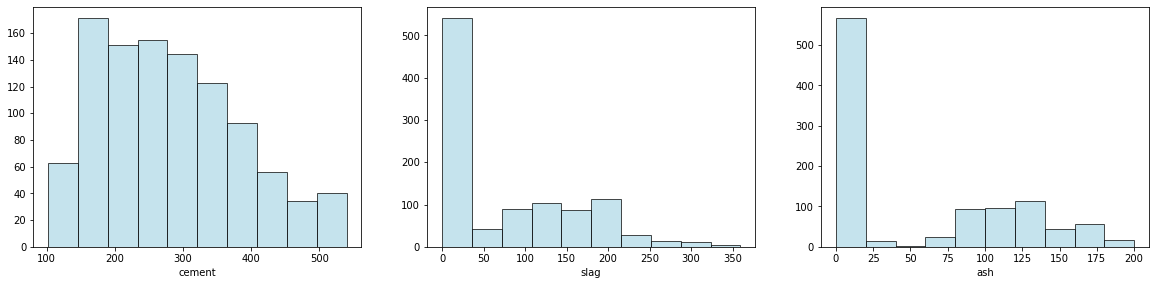

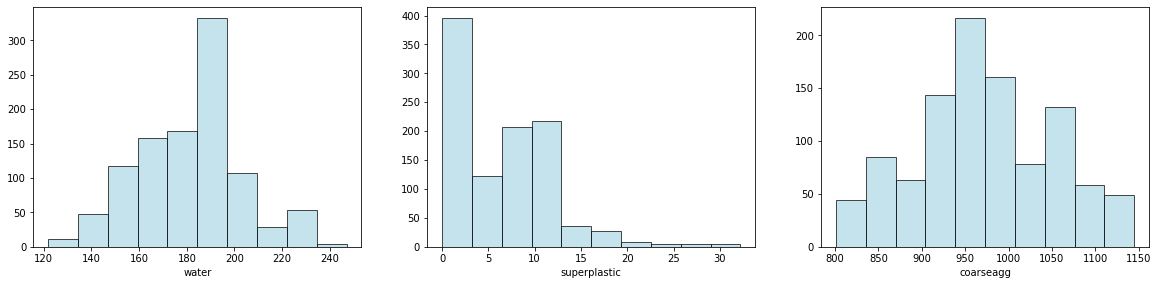

In [34]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data["cement"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('cement')

plt.subplot(3,3,2)
plt.hist(data["slag"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('slag')

plt.subplot(3,3,3)
plt.hist(data["ash"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('ash')

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data["water"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('water')

plt.subplot(3,3,2)
plt.hist(data["superplastic"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('superplastic')


plt.subplot(3,3,3)
plt.hist(data["coarseagg"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('coarseagg')


plt.show()


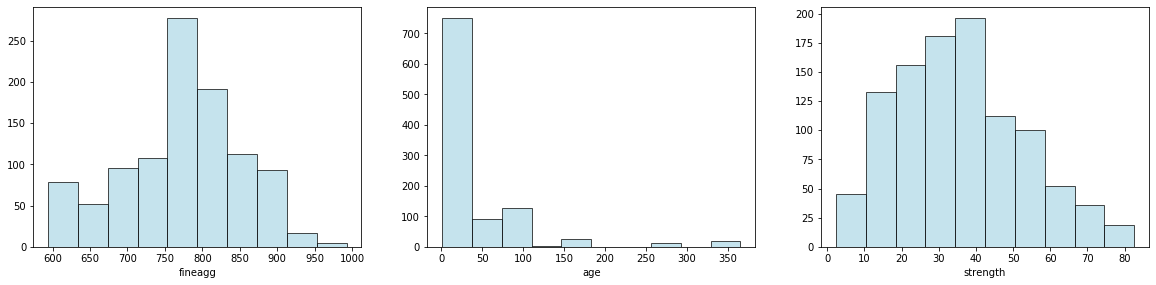

In [35]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data["fineagg"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('fineagg')

plt.subplot(3,3,2)
plt.hist(data["age"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(data["strength"], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('strength')


plt.show()


<h3><b> Alternatively, we can visualize distribution of attributes using distplot as follows : </b></h3>

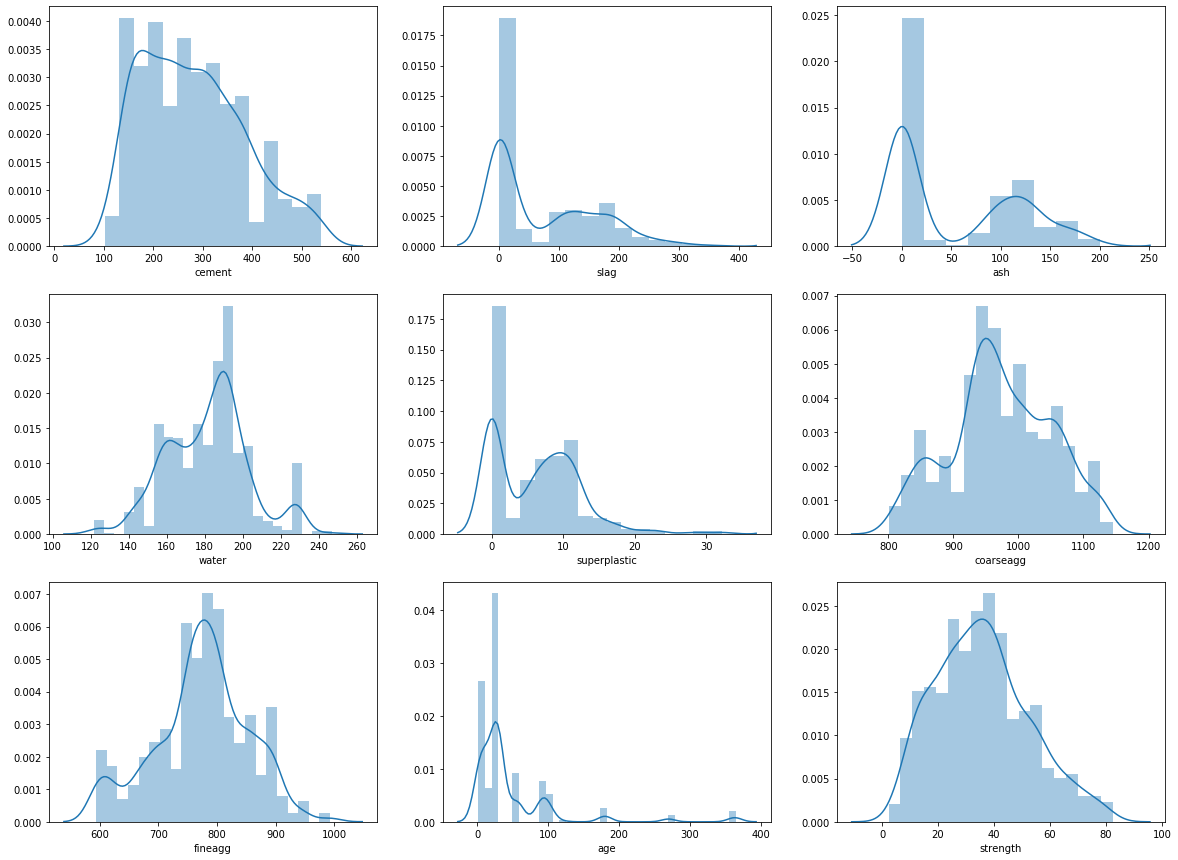

In [36]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
for i, column in enumerate(data.columns):
    sns.distplot(data[column],ax=axes[i//3,i%3])

<h3><b>We see that data values of majority of attributes are highly skewed.</b></h3>

<h3><b>We also see that distribution is not normal for majority of attributes, also <i><u>Slag, Ash, Superplastic, Age</u></i> has more spread and so more outliers. </b></h3>

<h3><b>The spread of majority of the attributes is large and also shows high degree of skewness. </b></h3>

<h3><b>Let's understand it more visually by visualizing its outliers and skewness values. </b></h3>

**Positively skewed:** Most frequent values are low and tail is towards high values.

**Negatively skewed:** Most frequent values are high and tail is towards low values.


If **Mode< Median< Mean** then the distribution is positively skewed.

If **Mode> Median> Mean** then the distribution is negatively skewed.

### We can see skewness of all the attributes as follows :

In [37]:
data.skew()

cement          0.509481
slag            0.800717
ash             0.537354
water           0.074628
superplastic    0.907203
coarseagg      -0.040220
fineagg        -0.253010
age             3.269177
strength        0.416977
dtype: float64

<h3><b>We see that most of the attributes are highly skewed, let's see the boxplot of some of them to visualize outliers as well.</b></h3>

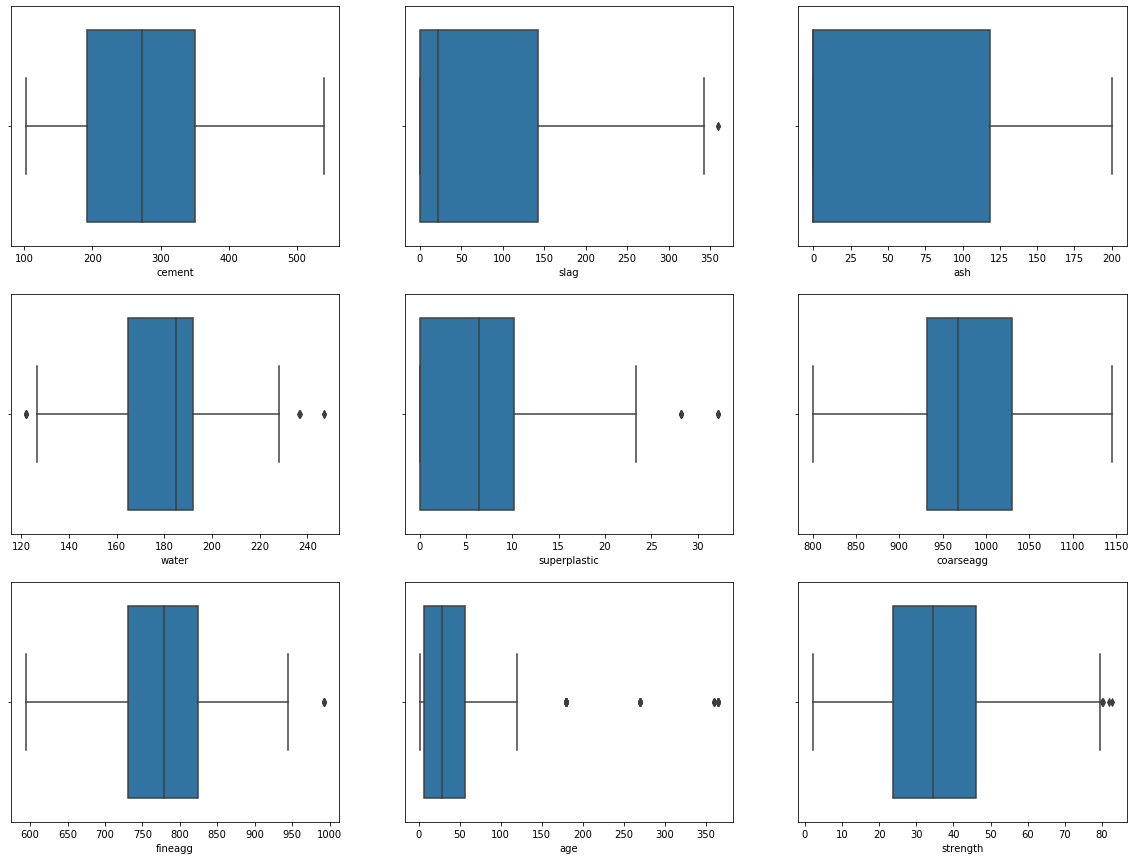

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15))
for i, column in enumerate(data.columns):
    sns.boxplot(data[column],ax=axes[i//3,i%3])

<h3><b>We clearly see that the attributes <i>Slag, Water, Superplastic, FineAgg, Age and Strength</i> has large number of attributes. Also their spread is more which can be seen from above distplot.<br /> <br /> So we need to treat the outliers, before further processing.  </b></h3>

# Bivarite Distribution of the attibutes :

A bivariate analysis among the different variables can be done using scatter matrix plot.

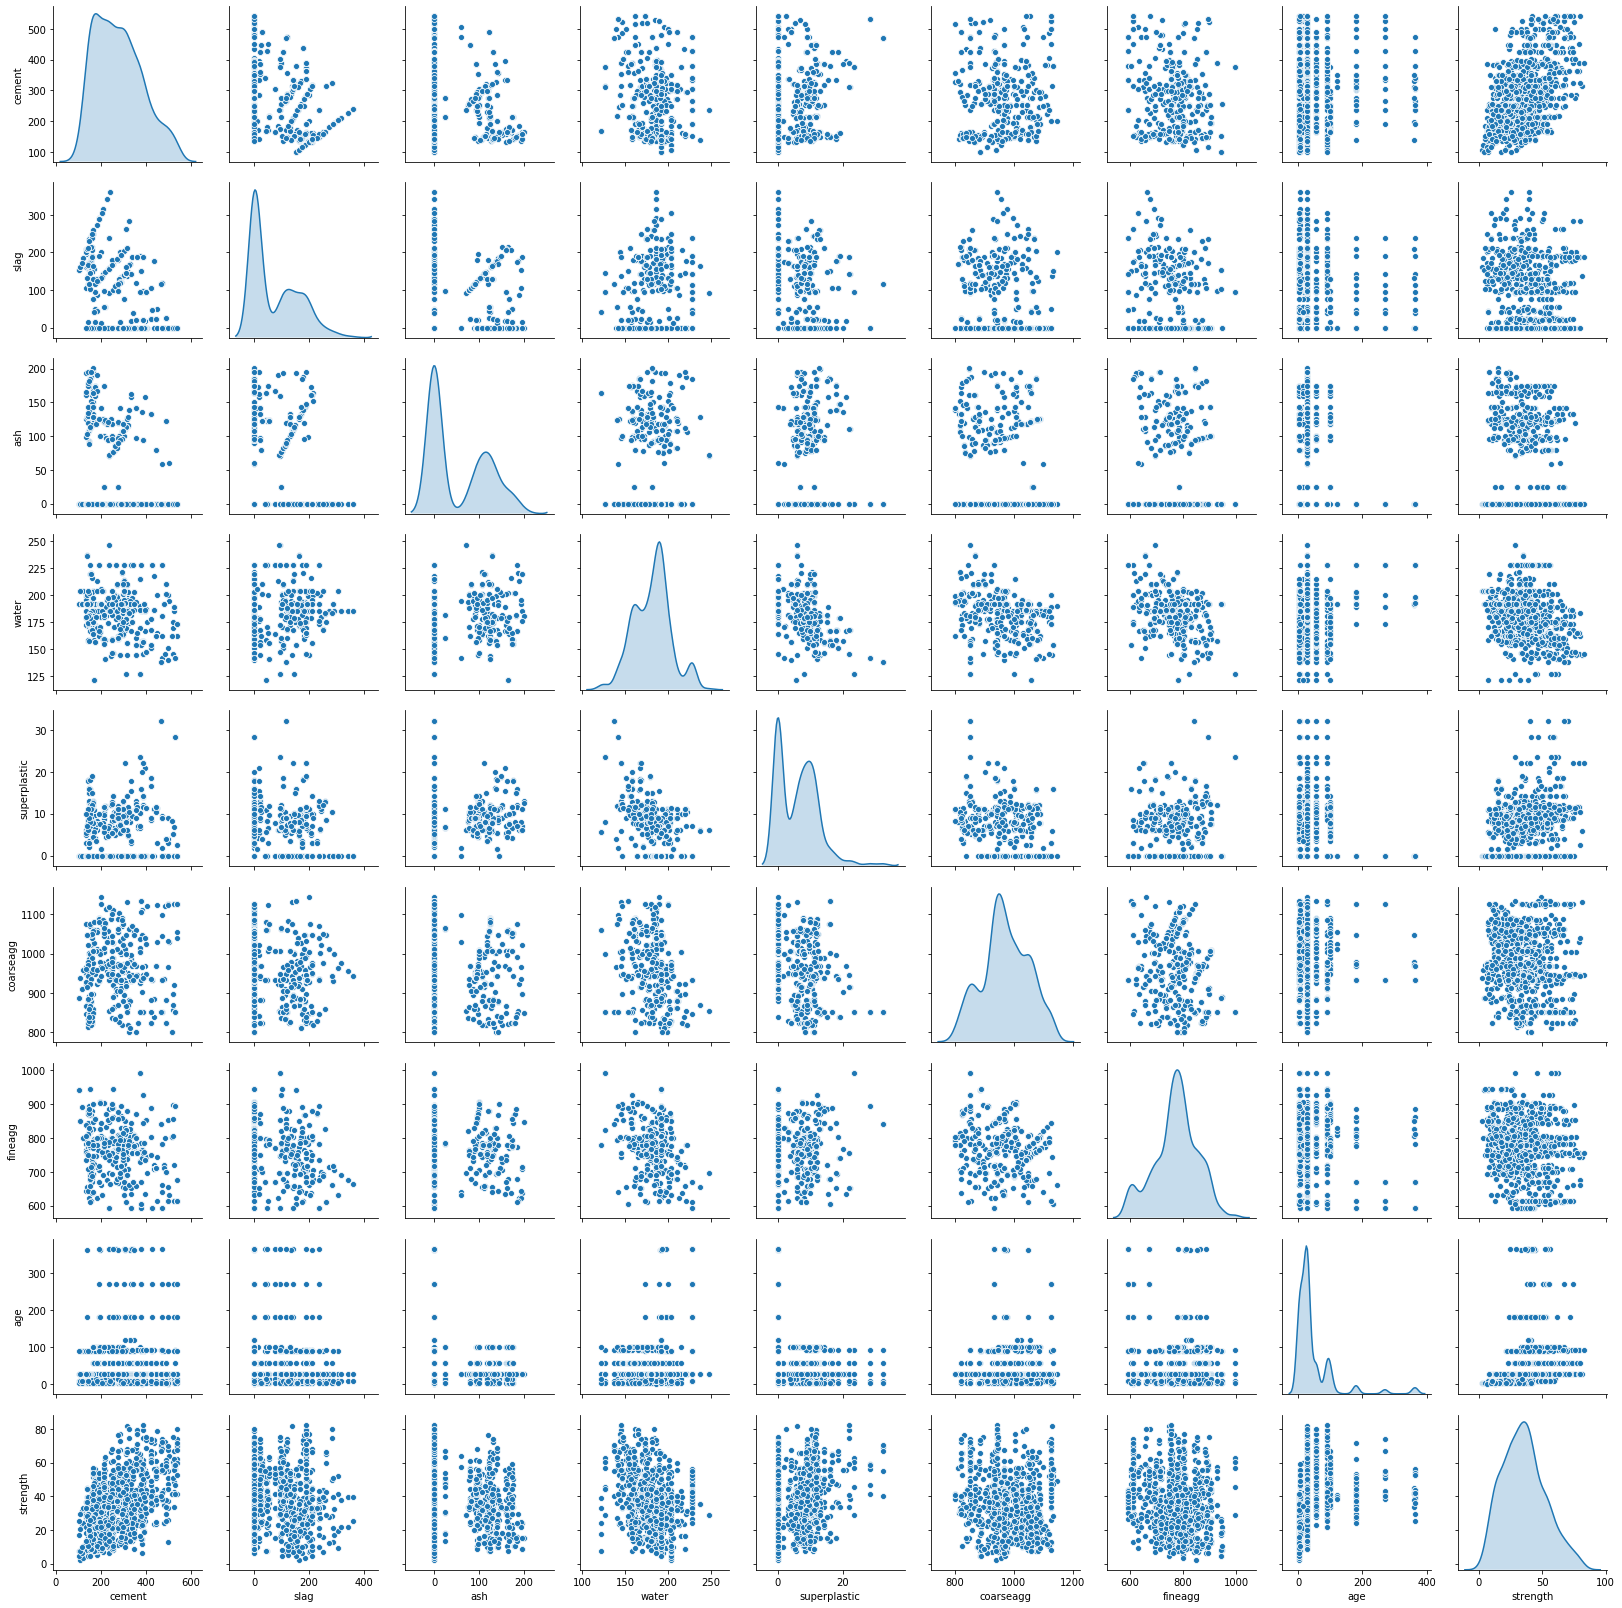

In [39]:
sns.pairplot(data, diag_kind='kde')

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"><u>Notable Observation:</u></span>

<h3> We see that our target variable strength is co-related with cement, but on the other hand features like fineagg, coarseagg shows quite low co-relation or seem quite unrealted or uninfluential to our target variable.

</h3>

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.7 Identify Correlation in the Data:

<h3><b>Its very essential to understand the correlation in the data attributes, since they largely influence the outcome of the model. Also, multicollinearity in the model can lead to sub optimal models. </b> </h3>

In [40]:
#Pearson co-effiecients

data.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplastic,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarseagg,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fineagg,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


<h3>
Let's visualize it using heatmaps or more visually.
</h3>

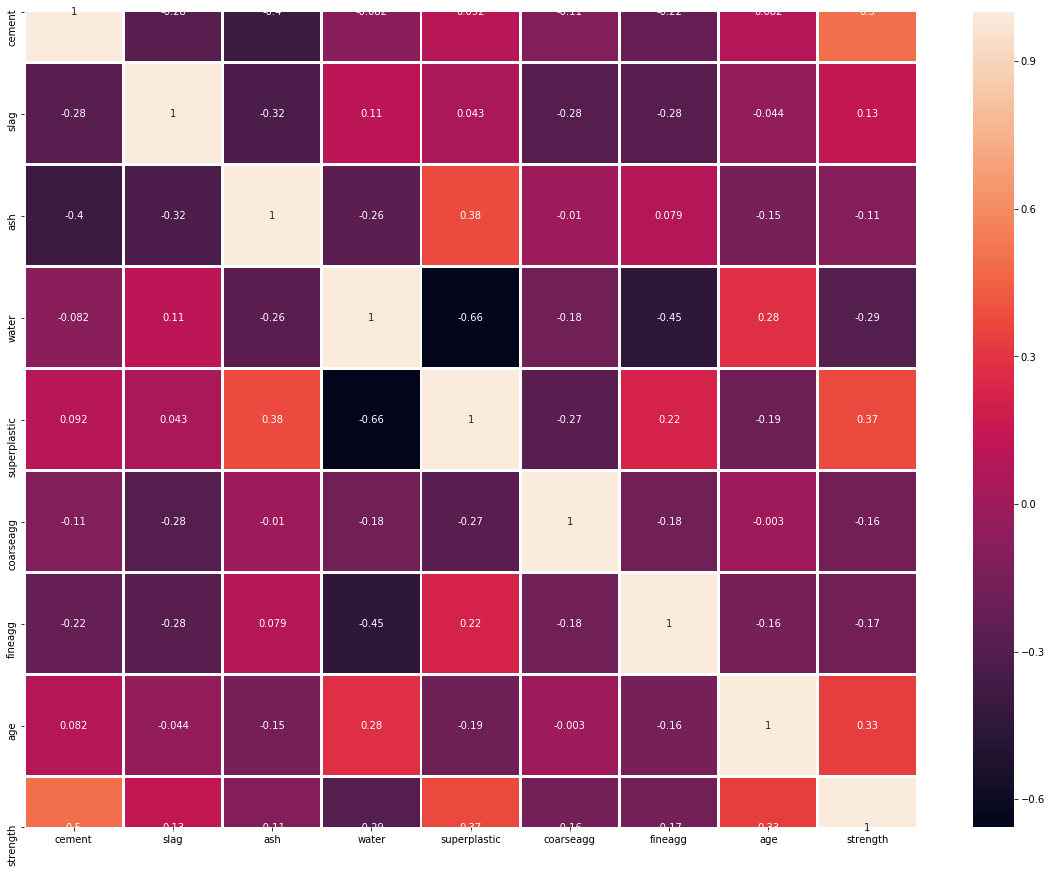

In [41]:
corr=data.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True,linewidths=2)

In [42]:
#Correlation with target variable
cor_target = abs(corr["strength"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

strength    1.0
Name: strength, dtype: float64

<h3><b><font color="blue"><u>Notable Inferences : </u></font>

    

We infer that, w.r.t our target variable i.e strength, we do not any see notable correlations (ones below -0.5 and ones above +0.5). 
</b></h3>

In [43]:
#Since, we can see that there is not highly correlated features so let's look for other less strong correalted feartures
#keeping threshold of 0.3
relevant_features = cor_target[cor_target > 0.3]
relevant_features

cement          0.497832
superplastic    0.366079
age             0.328873
strength        1.000000
Name: strength, dtype: float64

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.8 Identyfying and Treating Outliers : 

<h3><b> We wil use IQR strategy to handle outliers out of other strategies. 
    
<br /><br />
The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In other words, the IQR is the first quartile subtracted from the third quartile; these quartiles can be clearly seen on a box plot on the data.
It is a measure of the dispersion similar to standard deviation or variance, but is much more robust against outliers.

</b></h3>

In [44]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement          157.625
slag            142.950
ash             118.300
water            27.100
superplastic     10.200
coarseagg        97.400
fineagg          93.050
age              49.000
strength         22.425
dtype: float64


In [45]:
np.where((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

(array([  44,   51,   64,   66,   93,   99,  103,  129,  133,  144,  149,
         152,  156,  157,  159,  192,  198,  199,  207,  232,  256,  262,
         263,  270,  292,  297,  302,  312,  313,  323,  359,  361,  370,
         393,  432,  447,  448,  462,  465,  484,  504,  538,  539,  570,
         581,  584,  587,  594,  601,  620,  622,  623,  632,  642,  696,
         713,  720,  721,  732,  740,  744,  754,  755,  776,  789,  816,
         826,  838,  850,  857,  861,  878,  900,  901,  914,  918,  919,
         950,  951,  955,  957,  971,  985,  990,  995, 1003, 1017, 1026,
        1028]),
 array([4, 7, 7, 3, 7, 7, 7, 6, 7, 7, 7, 7, 4, 7, 7, 8, 7, 7, 7, 4, 7, 7,
        3, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 6, 7, 3, 7, 7, 6, 4, 7, 7,
        7, 6, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 3, 4, 7, 7, 7, 3, 4,
        3, 4, 7, 6, 7, 7, 7, 7, 3, 1, 7, 8, 7, 4, 7, 7, 7, 1, 7, 8, 7, 4,
        7]))

In [46]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
data_out.shape

(941, 9)

In [47]:
concrete_data = data.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(concrete_data < Q1 - 1.5 * IQR)[0], np.where(concrete_data < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    concrete_data.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(concrete_data > Q3 + 1.5 * IQR)[0], np.where(concrete_data > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    concrete_data.iloc[i,j] = whisker[j]

In [48]:
# concrete_data is the data set after outlier treatment

concrete_data.shape

(1030, 9)

In [49]:
concrete_data.describe()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.891893,54.188350,181.543252,6.159029,972.918932,773.439587,38.070388,35.812670
std,104.506364,86.266363,63.997004,21.225052,5.802457,77.753954,79.815303,35.782271,16.691447
min,102.000000,0.000000,0.000000,124.250000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,357.375000,200.100000,232.650000,25.500000,1145.000000,963.575000,129.500000,79.772500


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.9 Feature Engineering Techniques :

In [50]:
# We can see that age is given in days so analyse the age more specifically, we can label the age into months so understand the distribution
def labelAge(df):
    if df["age"]<=30:
        return "1 month"
    if df["age"]>30 and df["age"]<=60:
        return "2 months"
    if df["age"] > 60 and df["age"] <= 90 :
        return "3 months"
    if df["age"] > 90 and df["age"] <= 120 :
        return "4 months"
    if df["age"] > 120 and df["age"] <= 150 :
        return "5 months"
    if df["age"] > 150 and df["age"] <= 180 :
        return "6 months"
    if df["age"] > 180 and df["age"] <= 210 :
        return "7 months"
    if df["age"] > 210 and df["age"] <= 240 :
        return "8 months"
    if df["age"] > 240 and df["age"] <= 270 :
        return "9 months"
    if df["age"] > 270 and df["age"] <= 300 :
        return "10 months"
    if df["age"] > 300 and df["age"] <= 330 :
        return "11 months"
    if df["age"] > 330 :
        return "12 months"
concrete_data["age_months"]=concrete_data.apply(lambda concrete_data:labelAge(concrete_data),axis=1)        

In [51]:
concrete_data.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,age_months
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89,1 month
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51,1 month
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22,1 month
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85,1 month
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29,1 month


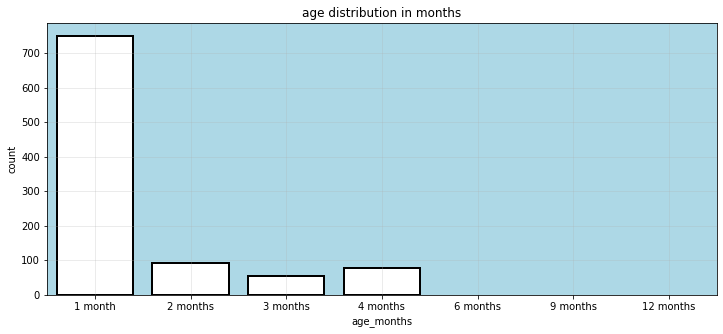

In [53]:
#See the age distribution through bar chart
plt.figure(figsize=(12,5))
order = ['1 month','2 months', '3 months','4 months','6 months','9 months', '12 months']
ax = sns.countplot(concrete_data["age_months"],
                   order=order,linewidth=2,
                   edgecolor = "k"*len(order),
                   palette=["w"])
ax.set_facecolor("lightblue")
plt.title("age distribution in months")
plt.grid(True,alpha=.3)
plt.show()

In [54]:
#from the above graph, we conclude that data has maximum 1 month old concerete.

# Deciding complexity of the model

<h3><b>Since, in this case, we need to predict strength, which is our target variable and also since its continuous varibale, we need to go with <i><u>Linear Regression Model</u></i> to predict the same. Complexity of the model will be liner.</b></h3>

# Split the data

In [55]:
X=concrete_data.drop('strength',axis=1)
X=X.drop('age_months',axis=1)
y=concrete_data['strength']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 8), (309, 8), (721,), (309,))

# 3. Feature selection using Embedded menthod


### Since we have lesser features here(9 features) so we can go with embedded method like Lasso and Ridge as this is more accurate.

# Iteration-1

Create a linear regression model since prediciting concrete compressive strength is a regression problem, so the linear regression results will serve as the baseline by which all subsequent models are judged.

Let's look at the coefficients and model performance when all attributes bring down to the same scale :between 0 and 1

# Linear Regression Model

In [56]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
#standard scale each column in training dataset and then do linear regression to analyse the factor important
mms.fit(X_train)  # scaled the indepedant columns
lr_model = LinearRegression()  #build a linear regression model
X_train_scaled=mms.transform(X_train)  #transform the x-scaled values
lr_model.fit(X_train_scaled,y_train)   #fit the model
lr_predictions=lr_model.predict(mms.transform(X_test))

In [57]:
X_test_scaled=mms.transform(X_test)

In [58]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X.columns)
for idx, col_name in enumerate(X_train_scaled.columns):
    print("The coefficient for {} is {}".format(col_name, lr_model.coef_[idx]))

The coefficient for cement is 49.92378517851403
The coefficient for slag is 34.16391502414535
The coefficient for ash is 14.542218371918587
The coefficient for water is -20.18768934225278
The coefficient for superplastic is 7.137571822014411
The coefficient for coarseagg is 1.9690530427034263
The coefficient for fineagg is 3.322066526358564
The coefficient for age is 33.06322642753988


In [63]:
intercept =lr_model.intercept_

print("The intercept for linear regression model is {}".format(intercept))

The intercept for linear regression model is 1.429252891979644


In [64]:
#Evaluation metrics for regression problems:MSE and RMSE
print('{} had Mean Squared Error of {}'.format('linear regression', mean_squared_error(y_test,lr_predictions)))
print('{} had Root Mean Squared Error of {}'.format('linear regression', r2_score(y_test, lr_predictions)))

linear regression had Mean Squared Error of 81.52830055386913
linear regression had Root Mean Squared Error of 0.6924139350476246


In [65]:
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X.columns)
X_test_scaled['cement']

0      0.851598
1      0.512557
2      0.147945
3      0.594977
4      0.314155
         ...   
304    0.255251
305    0.426941
306    0.888128
307    0.121005
308    0.085845
Name: cement, Length: 309, dtype: float64

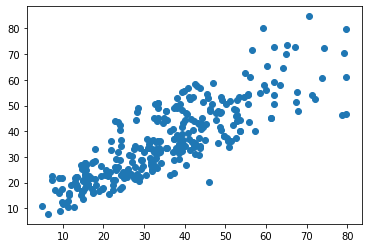

In [66]:
y_test=pd.DataFrame(y_test)

plt.scatter(y_test['strength'], lr_predictions)


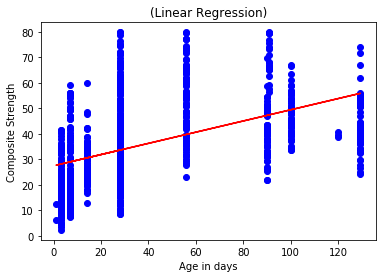

In [68]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
x_new=concrete_data["age"].values
x_new=pd.DataFrame(x_new)
y1=concrete_data["strength"].values
lin_reg.fit(x_new, y1)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(x_new, y1, color='blue')
    plt.plot(x_new, lin_reg.predict(x_new), color='red')
    plt.title('(Linear Regression)')
    plt.xlabel('Age in days')
    plt.ylabel('Composite Strength')
    plt.show()
    return
viz_linear()

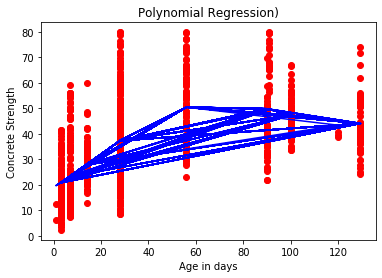

In [69]:
#In another hand, we will build the Polynomial Regression model and visualize it to see the differences:
# Fitting Polynomial Regression to the dataset

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x_new)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y1)


def viz_polymonial():
    plt.scatter(x_new, y1, color='red')
    plt.plot(x_new, pol_reg.predict(poly_reg.fit_transform(x_new)), color='blue')
    plt.title('Polynomial Regression)')
    plt.xlabel('Age in days')
    plt.ylabel('Concrete Strength')
    plt.show()
    return
viz_polymonial()

In [ ]:
#As we can see that age is a high non linear features with strength

As we can see that value of RMSE is 0.58, which is greater than 10% of the mean value of stregnth 35.817961.
This means that our algorithm was not very accurate but can still make reasonably good predictions.

There are many factors that may have contributed to this inaccuracy, for example 
1. We assumed that this data has a linear relationship, but that might not be the case. 
2. The features we used may not have had a good enough correlation to the values we were trying to predict.

# Regularized RIDGE model

In [70]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train_scaled,y_train)
print ("Ridge model:", (ridge.coef_))

Ridge model: [ 46.35003848  30.75761647  12.27299951 -22.77687326   7.32631218
  -0.40499357   0.08135724  32.81632623]


# Regularized LASSO model 

In [71]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled,y_train)
print ("Lasso model:", (lasso.coef_))

# Observe, many of the coefficients have become 0 indicating drop of those dimensions from the model i.e.coarseagg,fineagg

Lasso model: [ 41.66977907  25.88353777   8.36196834 -19.33309674   9.99317526
  -0.          -0.          31.08120083]


# Let us compare their scores

In [72]:
train_score=lr_model.score(X_train_scaled, y_train)
test_score=lr_model.score(X_test_scaled, y_test)

resultsDf = pd.DataFrame({'Method':['Linear Regression'],'Iteration':["1-with all columns"], 'Train Score': train_score,'Test Score':test_score})
resultsDf = resultsDf[['Method','Iteration' ,'Train Score','Test Score']]
resultsDf

,Method,Iteration,Train Score,Test Score
0,Linear Regression,1-with all columns,0.742477,0.692414


In [73]:
train_score=ridge.score(X_train_scaled, y_train)
test_score=ridge.score(X_test_scaled, y_test)
tempDf = pd.DataFrame({'Method':['Regularized Ridge Model'], 'Iteration':["1-with all columns"], 'Train Score': train_score,'Test Score':test_score})
resultsDf = resultsDf.append(tempDf,ignore_index=True)

train_score=lasso.score(X_train_scaled, y_train)
test_score=lasso.score(X_test_scaled, y_test)
tempDf = pd.DataFrame({'Method':['Regularized Lasso Model'], 'Iteration':["1-with all columns"], 'Train Score': train_score,'Test Score':test_score})
resultsDf = resultsDf.append(tempDf,ignore_index=True)
resultsDf

,Method,Iteration,Train Score,Test Score
0,Linear Regression,1-with all columns,0.742477,0.692414
1,Regularized Ridge Model,1-with all columns,0.742118,0.692136
2,Regularized Lasso Model,1-with all columns,0.735645,0.690471


In [74]:
resultsDf[:-3]  #.drop(resultsDf.index[2])

,Method,Iteration,Train Score,Test Score


# Conclusion from linear regressor:

### As we have seen that we are getting very bad score from the linear regressor so this also justify that our model is not a linear model beause it has some non-linear features, so for good results let us analyse the non linear regressor like decision tree regressor or random tree that will provide us the information on important features and we can skip the non value added features.

# DecisionTree Regressor

In [75]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()

In [76]:
dt_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [77]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Important features"], index = X_train.columns))

              Important features
cement                  0.390811
slag                    0.124016
ash                     0.007456
water                   0.101103
superplastic            0.028021
coarseagg               0.026520
fineagg                 0.016818
age                     0.305256


In [78]:
#For decision tree regressor also, we are getting important features as cement,age,water and slag while other features we can drop in iteration 2

In [79]:
train_score=dt_model.score(X_train_scaled, y_train)
test_score=dt_model.score(X_test_scaled, y_test)
tempDf = pd.DataFrame({'Method':['Decision Tree Regressor'], 'Iteration':["1-with all columns"], 'Train Score': train_score,'Test Score':test_score})
resultsDf = resultsDf.append(tempDf,ignore_index=True)
resultsDf

,Method,Iteration,Train Score,Test Score
0,Linear Regression,1-with all columns,0.742477,0.692414
1,Regularized Ridge Model,1-with all columns,0.742118,0.692136
2,Regularized Lasso Model,1-with all columns,0.735645,0.690471
3,Decision Tree Regressor,1-with all columns,0.994719,0.873071


# Iteration -2 (drop all the unnecessary columns)

In [80]:
# Since we have seen from the dataset that cement,age,water and slag are the important features while we can drop the other features
drop_cols = ['ash' , 'coarseagg' , 'fineagg' , 'superplastic' , 'strength']
X = concrete_data.drop(labels= drop_cols , axis = 1)

In [81]:
X=X.drop('age_months',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((721, 4), (309, 4), (721,), (309,))

In [82]:
mms = MinMaxScaler()
mms.fit(X_train)  # scaled the indepedant columns
#now check decision tree rgressor with four columns only
dt_model = DecisionTreeRegressor()  
X_train_scaled=mms.transform(X_train)  #transform the x-scaled values
dt_model.fit(X_train_scaled,y_train)   #fit the model
y_predictions=dt_model.predict(mms.transform(X_test))
X_test_scaled=mms.transform(X_test)

In [83]:
train_score=dt_model.score(X_train_scaled, y_train)
test_score=dt_model.score(X_test_scaled, y_test)

tempDf = pd.DataFrame({'Method':['Decision Tree Regressor'],'Iteration':["2- with 4 columns"], 'Train Score': train_score,'Test Score':test_score})
resultsDf = resultsDf.append(tempDf,ignore_index=True)
resultsDf

,Method,Iteration,Train Score,Test Score
0,Linear Regression,1-with all columns,0.742477,0.692414
1,Regularized Ridge Model,1-with all columns,0.742118,0.692136
2,Regularized Lasso Model,1-with all columns,0.735645,0.690471
3,Decision Tree Regressor,1-with all columns,0.994719,0.873071
4,Decision Tree Regressor,2- with 4 columns,0.993267,0.852570


### Let's also see the feature importance : 

In [85]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Important Features"], index = X_train.columns))

        Important Features
cement            0.392218
slag              0.116661
water             0.153692
age               0.337429


### With four columns only , we can see that we are still getting the high score for training as well there is only 2% decrease in test score  so there is not much decrease in model performance so we should go with four columns only to make our model simple but our model is not generalising well so we need to improve the performance.


### Let's create an ensemble model or forest where sample data is bootstrapped version of your original training data.

# Ensemble Techniques

In [86]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn import model_selection
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

In [87]:
gbmTree = GradientBoostingRegressor(n_estimators=50)
gbmTree.fit(X_train_scaled,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [88]:
train_score=gbmTree.score(X_train_scaled, y_train)
test_score=gbmTree.score(X_test_scaled, y_test)

tempDf = pd.DataFrame({'Method':['GradientBoosting Regressor'],'Iteration':["2- with 4 columns"], 'Train Score': train_score,'Test Score':test_score})
resultsDf = resultsDf.append(tempDf,ignore_index=True)
resultsDf

,Method,Iteration,Train Score,Test Score
0,Linear Regression,1-with all columns,0.742477,0.692414
1,Regularized Ridge Model,1-with all columns,0.742118,0.692136
2,Regularized Lasso Model,1-with all columns,0.735645,0.690471
3,Decision Tree Regressor,1-with all columns,0.994719,0.873071
4,Decision Tree Regressor,2- with 4 columns,0.993267,0.852570
5,GradientBoosting Regressor,2- with 4 columns,0.905289,0.848397


In [89]:
#BaggingRegressor
bgcl = BaggingRegressor(n_estimators=50, oob_score= True)
bgcl = bgcl.fit(X_train_scaled,y_train)

train_score=bgcl.score(X_train_scaled, y_train)
test_score=bgcl.score(X_test_scaled, y_test)

tempDf = pd.DataFrame({'Method':['Bagging Regressor'],'Iteration':["2- with 4 columns"], 'Train Score': train_score,'Test Score':test_score})
resultsDf = resultsDf.append(tempDf,ignore_index=True)
resultsDf

,Method,Iteration,Train Score,Test Score
0,Linear Regression,1-with all columns,0.742477,0.692414
1,Regularized Ridge Model,1-with all columns,0.742118,0.692136
2,Regularized Lasso Model,1-with all columns,0.735645,0.690471
3,Decision Tree Regressor,1-with all columns,0.994719,0.873071
4,Decision Tree Regressor,2- with 4 columns,0.993267,0.852570
5,GradientBoosting Regressor,2- with 4 columns,0.905289,0.848397
6,Bagging Regressor,2- with 4 columns,0.979451,0.897459


In [90]:
#Random Forest Regressor
rfr_model = RandomForestRegressor(n_estimators=50)
rfr_model.fit(X_train_scaled,y_train)

train_score=rfr_model.score(X_train_scaled, y_train)
test_score=rfr_model.score(X_test_scaled, y_test)
tempDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'Iteration':["2- with 4 columns"], 'Train Score': train_score,'Test Score':test_score})
resultsDf = resultsDf.append(tempDf,ignore_index=True)
resultsDf

,Method,Iteration,Train Score,Test Score
0,Linear Regression,1-with all columns,0.742477,0.692414
1,Regularized Ridge Model,1-with all columns,0.742118,0.692136
2,Regularized Lasso Model,1-with all columns,0.735645,0.690471
3,Decision Tree Regressor,1-with all columns,0.994719,0.873071
4,Decision Tree Regressor,2- with 4 columns,0.993267,0.852570
5,GradientBoosting Regressor,2- with 4 columns,0.905289,0.848397
6,Bagging Regressor,2- with 4 columns,0.979451,0.897459
7,Random Forest Regressor,2- with 4 columns,0.979578,0.893230


### From the above regressor we can see that we are getting the best results from GradientBoosting Regressor and Random Forest Regressor.

### To improve the perfromance , we will tune the model usinh hyper parameters and analyse the model performance.

# Model Tuning using Hyper Parameters :

In [91]:
from pprint import pprint
rf = RandomForestRegressor(random_state = 1)
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 1,
 'verbose': 0,
 'warm_start': False}


# RandomSearchCV

In [92]:
import numpy as np
print(np.linspace(start = 5, stop = 10, num = 2))

[ 5. 10.]


In [93]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 15, num = 2)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [5, 10, None],
 'max_features': ['auto', 'log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 15]}


In [94]:
# Use the random grid to search for best hyperparameters

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,return_train_score=True)

rf_random.fit(X_train_scaled, y_train);

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    5.3s finished


In [95]:
rf_random.best_params_

{'n_estimators': 15,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': None,
 'bootstrap': False}

In [96]:
best_randommodel = rf_random.best_estimator_ 
best_randommodel.score(X_test_scaled , y_test)

0.8923935424515549

In [97]:
train_score=best_randommodel.score(X_train_scaled, y_train)
test_score=best_randommodel.score(X_test_scaled , y_test)
tempDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'Iteration':["3- with 4 columns using RandomSerachCV"], 'Train Score': train_score,'Test Score':test_score})
resultsDf = resultsDf.append(tempDf,ignore_index=True)
resultsDf

,Method,Iteration,Train Score,Test Score
0,Linear Regression,1-with all columns,0.742477,0.692414
1,Regularized Ridge Model,1-with all columns,0.742118,0.692136
2,Regularized Lasso Model,1-with all columns,0.735645,0.690471
3,Decision Tree Regressor,1-with all columns,0.994719,0.873071
4,Decision Tree Regressor,2- with 4 columns,0.993267,0.852570
5,GradientBoosting Regressor,2- with 4 columns,0.905289,0.848397
6,Bagging Regressor,2- with 4 columns,0.979451,0.897459
7,Random Forest Regressor,2- with 4 columns,0.979578,0.893230
8,Random Forest Regressor,3- with 4 columns using RandomSerachCV,0.983499,0.892394


### Results have decreased using randomsearchCV, this might be due to suboptimal combination of hyper parameters.

# Gaussian Mixed Clustering

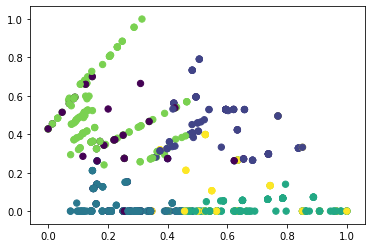

In [98]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters= 6)
kmeans.fit(X_train_scaled)
labels = kmeans.labels_
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=labels, s=40, cmap='viridis');

In [99]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4)
gmm.fit(X_train_scaled)

y_cluster_gmm = gmm.predict(X_train_scaled)
y_cluster_gmm

array([3, 0, 3, 0, 3, 0, 3, 2, 3, 3, 3, 2, 3, 3, 3, 0, 2, 3, 0, 0, 1, 3,
       2, 0, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 3, 2, 1, 3, 1, 2, 1, 3,
       0, 3, 2, 2, 3, 3, 0, 0, 0, 2, 3, 0, 2, 3, 2, 3, 3, 3, 0, 3, 0, 2,
       3, 3, 2, 2, 2, 0, 2, 3, 0, 2, 3, 0, 2, 2, 0, 3, 3, 0, 3, 3, 3, 2,
       0, 2, 2, 1, 3, 1, 0, 2, 1, 3, 2, 2, 2, 1, 3, 2, 2, 3, 0, 3, 3, 0,
       0, 2, 0, 1, 3, 3, 3, 3, 2, 3, 3, 0, 2, 3, 3, 1, 2, 2, 2, 3, 0, 0,
       2, 2, 3, 3, 0, 3, 3, 2, 3, 3, 3, 2, 1, 0, 1, 3, 3, 3, 0, 3, 1, 3,
       3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 2,
       0, 2, 3, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 3, 0, 3, 3, 3, 3,
       2, 3, 3, 0, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 0, 0, 0, 0, 0,
       0, 3, 2, 3, 2, 0, 2, 3, 3, 3, 1, 3, 3, 0, 2, 2, 3, 3, 3, 3, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 0, 3, 0, 3, 3, 2, 0, 3, 3, 3, 2, 3, 0,
       3, 3, 3, 1, 3, 0, 3, 3, 3, 2, 3, 3, 0, 2, 3, 3, 3, 2, 3, 3, 2, 0,
       3, 2, 2, 0, 1, 0, 0, 2, 2, 0, 3, 0, 2, 2, 3,

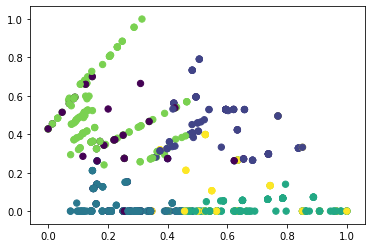

In [100]:
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=labels, s=40, cmap='viridis');

In [101]:
#Let's see the clusters for each independant variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2089fe90>,
      dtype=object)

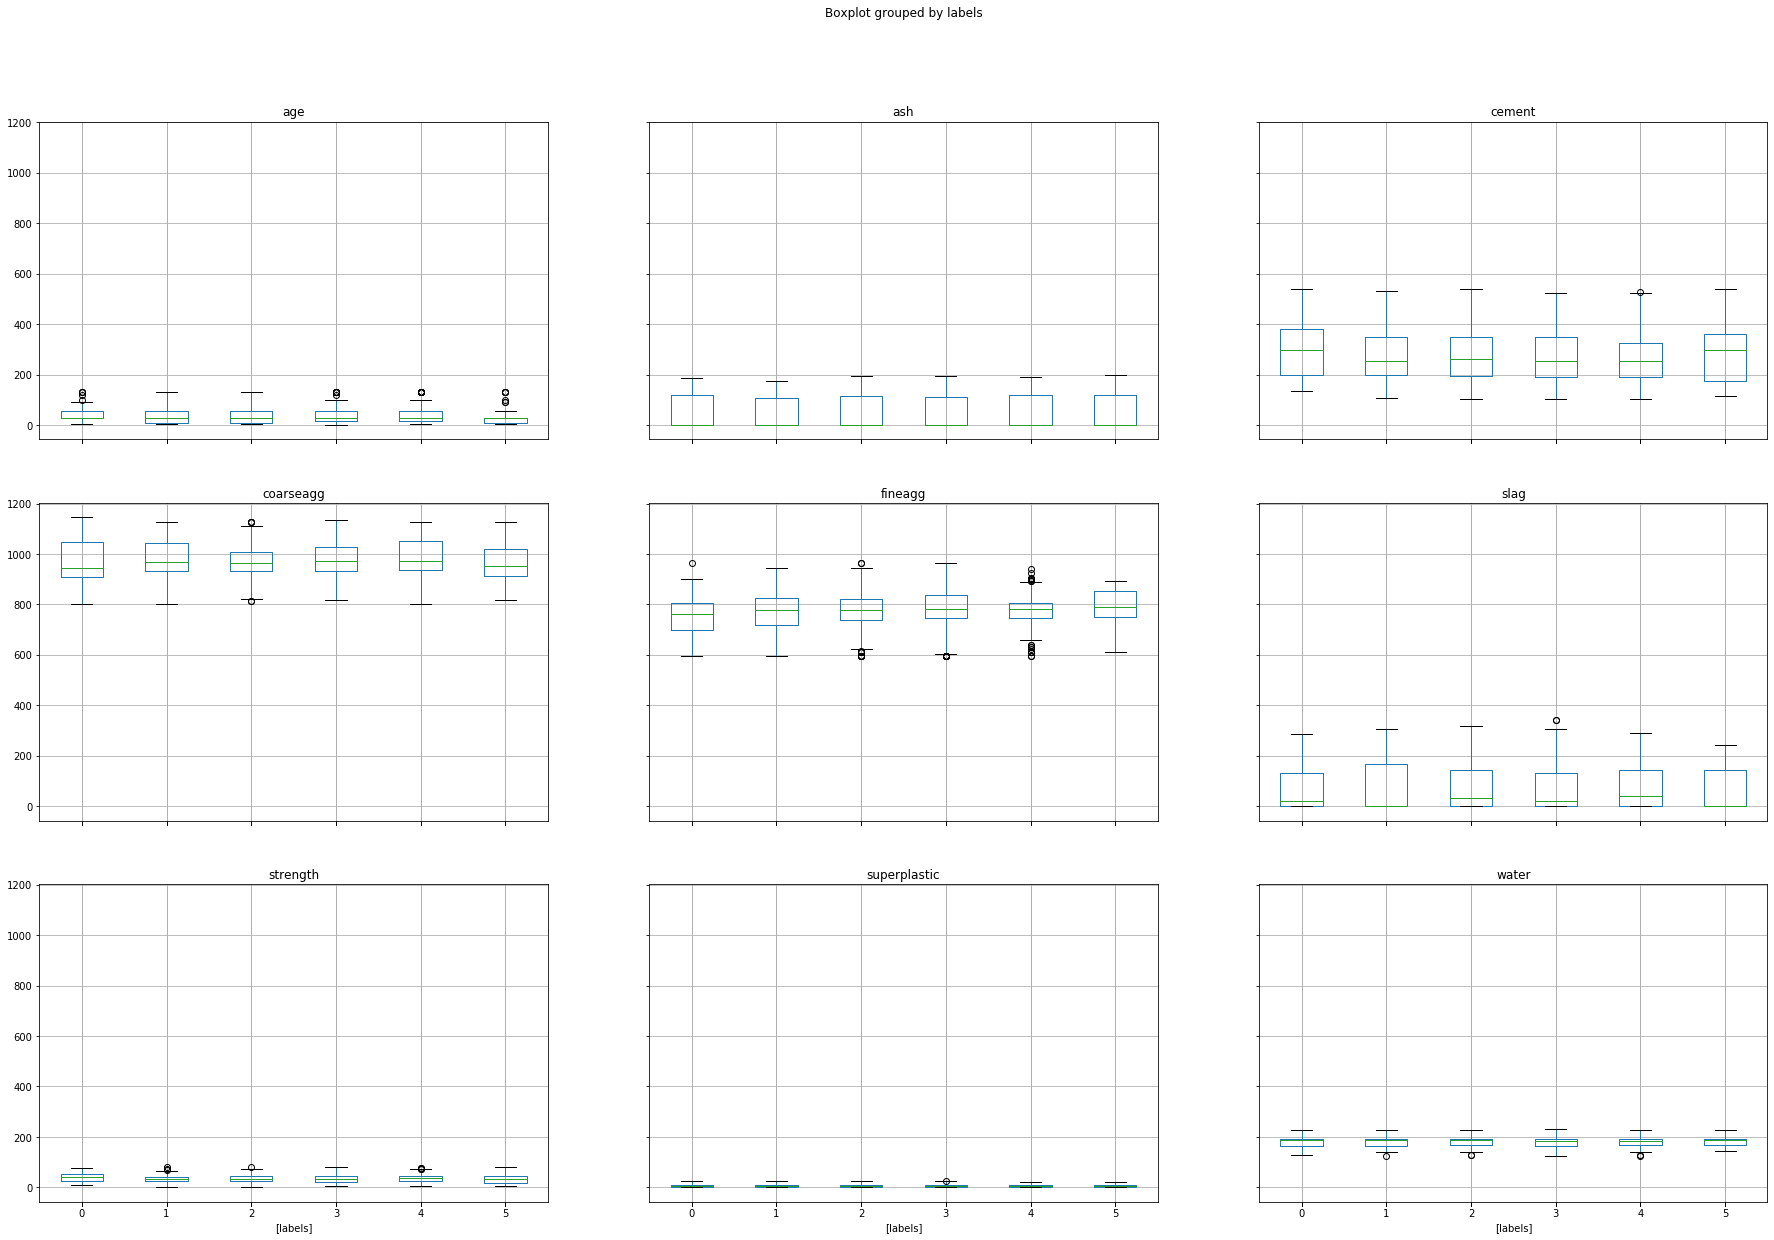

In [102]:
## creating a new dataframe only for labels and converting it into categorical variable
cluster_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
cluster_labels['labels'] = cluster_labels['labels'].astype('category')
concrete_labeled = concrete_data.join(cluster_labels)

concrete_labeled.boxplot(by = 'labels',  layout=(3,3), figsize=(30, 20))

### We do not have indistinguishable clusters. Looks like the attributes are weak predictors except for cement. 



# Model performance range at 95% confidence level 

# Configure bootstrap

The bootstrap is simulated resampling method where samples are drawn from a fixed finite concrete dataset with replacement and a parameter is estimated on each sample. This procedure leads to a robust estimate of the true population parameter via sampling.
The procedure can be used to estimate the skill of a predictive model by fitting the model on each sample and evaluating the skill of the model on those samples not included in the sample

In [103]:
concrete_XY = X.join(y)

In [105]:
values = concrete_XY.values
n_iterations = 1000        # Number of bootstrap samples to create
n_size = int(len(concrete_data) * 1)    # size of a bootstrap sample
# run bootstrap
stats = list()   # empty list that will hold the scores for each bootstrap iteration

for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # out of bag (OOB) samples -picking rest of the data not considered in sample
    
    
    # fit model
    rfTree = RandomForestRegressor(n_estimators=50)
    rfTree.fit(train[:,:-1], train[:,-1])   # fit against independent variables and corresponding target values
    y_test = test[:,-1]    # Take the target column for all rows in test set

    # evaluate model
    predictions = rfTree.predict(test[:, :-1])   # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)

    stats.append(score)

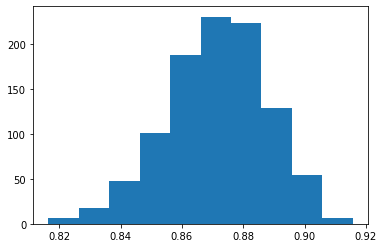

95.0 confidence interval 83.7% and 90.0%


In [106]:
# plot scores

plt.hist(stats)
plt.show()

# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [107]:
from numpy import median
print('50th percentile (median) = %.3f' % median(stats))

50th percentile (median) = 0.872


<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;"> 1.12 Conslusion and Inferences :

### We can say that there is 95% likelihood that range 83.7% and 89.9% covers the true statistic mean of the model or what we are estimating about the population(the most likely value)

### In other words, we can say that we are 95% confident that the real score for random forest regressor model on the unseen data is between  83.7% and 89.9% as well as it represents the margin of error or the amount of uncertainty around the sample mean.
